# A/B Testing

## By Theory

| Outcome       | Price A | Price B |
| ------------- | ------- | ------- |
| Conversion    | 200     | 182     |
| No conversion | 23.539  | 22.406  |

In [49]:
import pandas as pd

In [50]:
data = {
    "Price A": [200, 23_539],
    "Price B": [182, 22_406]
}

df = pd.DataFrame(data, index=["Conversion", "No conversion"])
print(f"Price A, no conversion: {df.loc["No conversion", "Price A"]}")

Price A, no conversion: 23539


In [51]:
a_sum = int(df.loc["Conversion"]["Price A"] + df.loc["No conversion"]["Price A"])
p_a = df.loc["Conversion"]["Price A"] / a_sum
p_a

np.float64(0.008424954715868403)

In [52]:
b_sum = int(df.loc["Conversion"]["Price B"] + df.loc["No conversion"]["Price B"])
p_b = df.loc["Conversion"]["Price B"] / b_sum
p_b

np.float64(0.008057375597662475)

In [53]:
p_hat = (df.loc["Conversion"]["Price B"] + df.loc["Conversion"]["Price A"]) / (a_sum + b_sum)
p_hat

np.float64(0.008245731430915016)

In [54]:
import math
import scipy.stats as st
z = (p_a - p_b) / math.sqrt(p_hat*(1-p_hat)*((1/a_sum) + (1/b_sum)))
one_sided_prob = 1 - st.norm.cdf(z)
one_sided_prob

np.float64(0.33094407441560325)

We can't reject the null hypothesis since our $\text{p-value (0.33)} \gt 0.05$.

## By Resampling

In [55]:
total_conversion = df.loc["Conversion"]["Price A"] + df.loc["Conversion"]["Price B"]
total_no_conversion = df.loc["No conversion"]["Price A"] + df.loc["No conversion"]["Price B"]
overall = list(([1] * total_conversion) + ([0] * total_no_conversion))

count = 500

import random

a_list_sim = []
b_list_sim = []
bigger_count = 0
perm_diffs = []

for _ in range(count):
    random.shuffle(overall)
    a = len([item for item in overall[:a_sum] if item == 1]) / a_sum
    b = len([item for item in overall[a_sum:(a_sum+b_sum)] if item == 1]) / b_sum
    perm_diffs.append(a - b) 

perm_diff_greater = 0
for item in perm_diffs:
    if item >= p_a - p_b:
        perm_diff_greater += 1
print(f"{perm_diff_greater} / {count} = {perm_diff_greater/count}")

perm_diffs.sort()
needed_portion_start_index = len(perm_diffs) - len(perm_diffs) * 0.05

172 / 500 = 0.344


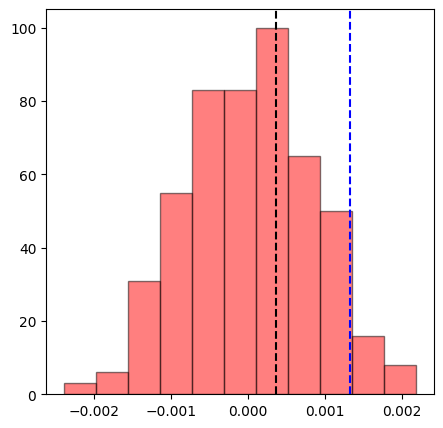

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(perm_diffs,bins=11, alpha=0.5, edgecolor="black", color="red")
plt.axvline(x=p_a - p_b, color="black", linestyle="--")
plt.axvline(x=perm_diffs[int(needed_portion_start_index - 1)], color="blue", linestyle="--")
plt.show()

Right part of the black line represents the p-value. And the blue line represents the critical value (for a 95% confidence level).

Again, we can also accept the null hypothesis using the permutation test because $\text{p-value (0.3...)} \gt 0.05$

## With Tools

In [57]:
from scipy.stats import chi2_contingency
import numpy as np

survivors = np.array([
    [df.loc["Conversion"]["Price A"], df.loc["No conversion"]["Price A"]],
    [df.loc["Conversion"]["Price B"], df.loc["No conversion"]["Price B"]]
])

chi2, p_value, df, _ = chi2_contingency(survivors)
print(f"p-value for single sided test: {p_value / 2}")

p-value for single sided test: 0.34977973135733076
